In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import cv2
import random
from google.colab import drive



# === STEP 2: Set paths ===
input_root = '/content/drive/MyDrive/Video'  # Change if your folder is named differently
output_root = '/content/output'

# === STEP 3: Create output folder and subfolders ===
os.makedirs(output_root, exist_ok=True)

for shot_type in sorted(os.listdir(input_root)):
    shot_input_path = os.path.join(input_root, shot_type)
    shot_output_path = os.path.join(output_root, shot_type)
    if os.path.isdir(shot_input_path):
        os.makedirs(shot_output_path, exist_ok=True)

        # === STEP 4: Process each video ===
        for video_file in sorted(os.listdir(shot_input_path)):
            if not video_file.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
                continue

            video_path = os.path.join(shot_input_path, video_file)
            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f"⚠️ Could not open {video_path}")
                continue

            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if frame_count <= 0:
                print(f"⚠️ No frames in {video_path}")
                cap.release()
                continue

            random_frame_idx = random.randint(0, frame_count - 1)
            cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_idx)
            ret, frame = cap.read()
            cap.release()

            if not ret:
                print(f"⚠️ Failed to read frame {random_frame_idx} from {video_file}")
                continue

            # Resize to 240x240
            frame_resized = cv2.resize(frame, (240, 240))

            # Save as .jpg with same name as video
            frame_name = os.path.splitext(video_file)[0] + ".jpg"
            output_path = os.path.join(shot_output_path, frame_name)
            cv2.imwrite(output_path, frame_resized)

            print(f"✅ Saved frame from {video_file} to {output_path}")

print("\n🎉 Done! Check the '/content/output' folder.")


Streaming output truncated to the last 5000 lines.
✅ Saved frame from 2022-09-06_18-09-11_dataset_set1_062_004423_004453_B_05.mp4 to /content/output/Drop Shot/2022-09-06_18-09-11_dataset_set1_062_004423_004453_B_05.jpg
✅ Saved frame from 2022-09-06_18-09-11_dataset_set1_077_005490_005520_A_05.mp4 to /content/output/Drop Shot/2022-09-06_18-09-11_dataset_set1_077_005490_005520_A_05.jpg
✅ Saved frame from 2022-09-06_18-09-11_dataset_set1_078_005520_005554_B_05.mp4 to /content/output/Drop Shot/2022-09-06_18-09-11_dataset_set1_078_005520_005554_B_05.jpg
✅ Saved frame from 2022-09-06_18-09-11_dataset_set1_079_005554_005578_A_05.mp4 to /content/output/Drop Shot/2022-09-06_18-09-11_dataset_set1_079_005554_005578_A_05.jpg
✅ Saved frame from 2022-09-06_18-09-11_dataset_set1_086_005985_006015_B_05.mp4 to /content/output/Drop Shot/2022-09-06_18-09-11_dataset_set1_086_005985_006015_B_05.jpg
✅ Saved frame from 2022-09-06_18-09-11_dataset_set1_092_006358_006390_B_05.mp4 to /content/output/Drop Shot/2

In [6]:
import os
import pandas as pd

# Set path to the folder where your 18 shot-type subfolders exist
output_root = '/content/output'  # ← change this if needed

# Step 1: List all 18 shot type folders
shot_types = sorted([folder for folder in os.listdir(output_root)
                     if os.path.isdir(os.path.join(output_root, folder))])

print("📂 Detected shot types:", shot_types)

# Step 2: Initialize list to hold rows
data_rows = []

# Step 3: Loop through each shot type folder
for shot in shot_types:
    shot_folder = os.path.join(output_root, shot)
    for img_file in os.listdir(shot_folder):
        if img_file.lower().endswith('.jpg'):
            # Create one-hot encoding row
            row = {'filename': img_file}
            for s in shot_types:
                row[s] = 1 if s == shot else 0
            data_rows.append(row)

# Step 4: Convert to DataFrame
df = pd.DataFrame(data_rows)

# Optional: Reorder columns: filename first, then shot types
df = df[['filename'] + shot_types]

# Step 5: Save to CSV
csv_output_path = '/content/shot_labels.csv'
df.to_csv(csv_output_path, index=False)

print(f"✅ CSV saved at: {csv_output_path}")
df.head()


📂 Detected shot types: ['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice']
✅ CSV saved at: /content/shot_labels.csv


filename  Block  Clear  \
0  2022-09-06_18-17-28_dataset_set1_154_013311_01...      1      0   
1  2022-09-06_18-09-11_dataset_set1_178_013389_01...      1      0   
2  2022-08-31_18-04-29_dataset_set1_124_010999_01...      1      0   
3  2022-09-06_17-42-57_dataset_set1_059_005320_00...      1      0   
4  2022-08-31_18-59-49_dataset_set1_110_009332_00...      1      0   

   Cross Court Flight  Cut  Defensive Clear  Defensive Drive  Drop Shot  \
0                   0    0                0                0          0   
1                   0    0                0                0          0   
2                   0    0                0                0          0   
3                   0    0                0                0          0   
4                   0    0                0                0          0   

   Flat Shot  Lift  Long Serve  Push Shot  Rear Court Flat Drive  Rush Shot  \
0          0     0           0          0                      0          0   
1          0     0           0          0                      0          0   
2          0     0           0          0                      0          0   
3          0     0           0          0                      0          0   
4          0     0           0          0                      0          0   

   Short Flat Shot  Short Serve  Smash  Tap Smash  Transitional Slice  
0                0            0      0          0                   0  
1                0            0      0          0                   0  
2                0            0      0          0                   0  
3                0            0      0          0                   0  
4                0            0      0          0                   0

In [7]:
from google.colab import files

uploaded = files.upload()


Saving shot_labels.csv to shot_labels (1).csv


CNN

In [8]:
# Import necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
# Modify the dataset class to return a single label
class BadmintonDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = pd.read_csv('shot_labels.csv')
        self.img_dir = img_dir
        self.transform = transform

        print("Columns in the CSV file:")
        print(self.annotations.columns)

        # Identify shot type columns (excluding 'filename')
        self.classes = [col for col in self.annotations.columns if col != 'filename']

        print("\nIdentified shot type columns:")
        print(self.classes)

        # Print sample data
        print("\nSample data (first 5 rows):")
        print(self.annotations.head())

        # Print data types of columns
        print("\nData types of columns:")
        print(self.annotations.dtypes)

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_name = self.annotations.iloc[index, 0]  # 'filename' column
        img_path = os.path.join(self.img_dir, img_name)

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        image = Image.open(img_path).convert("RGB")

        # Get the index of the correct class (1 in the one-hot encoding)
        label = torch.tensor(self.annotations.iloc[index][self.classes].values.astype(np.float32))
        label = torch.argmax(label).item()

        if self.transform:
            image = self.transform(image)

        return (image, label)

Columns in the CSV file:
Index(['filename', 'Block', 'Clear', 'Cross Court Flight', 'Cut',
       'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift',
       'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot',
       'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash',
       'Transitional Slice'],
      dtype='object')

Identified shot type columns:
['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice']

Sample data (first 5 rows):
                                            filename  Block  Clear  \
0  2022-09-06_18-17-28_dataset_set1_154_013311_01...      1      0   
1  2022-09-06_18-09-11_dataset_set1_178_013389_01...      1      0   
2  2022-08-31_18-04-29_dataset_set1_124_010999_01...      1      0   
3  2022-09-06_17-42-57_dataset_set1_059_

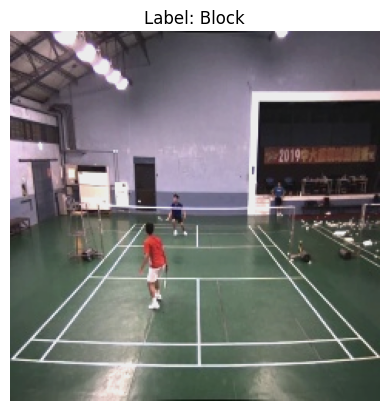

First image displayed.


In [10]:
# # Data Transforms: Reduce dimensions
# data_transforms = transforms.Compose([
#     transforms.Resize((240, 240)),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Load Data
# dataset = BadmintonDataset(csv_file='filtered_classes.csv', img_dir='images', transform=data_transforms)

# # Function to display the first image with its labels
# def display_first_image(dataset):
#     image, label = dataset[0]
#     image = image.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)
#     image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
#     image = image.clip(0, 1)  # Clip values to [0, 1] range

#     plt.imshow(image)
#     title = f"Label: {dataset.classes[label]}"
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# # Display the first image
# display_first_image(dataset)
# print("First image displayed.")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Modified BadmintonDataset class to handle subfolder structure
class BadmintonDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

        print("Columns in the CSV file:")
        print(self.annotations.columns)

        # Identify shot type columns (excluding 'filename')
        self.classes = [col for col in self.annotations.columns if col != 'filename']

        print("\nIdentified shot type columns:")
        print(self.classes)

        # Print sample data
        print("\nSample data (first 5 rows):")
        print(self.annotations.head())

        # Print data types of columns
        print("\nData types of columns:")
        print(self.annotations.dtypes)

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_name = self.annotations.iloc[index, 0]  # 'filename' column

        # Determine the shot type (class) for this image
        label_vector = self.annotations.iloc[index][self.classes].values
        label_idx = np.argmax(label_vector)
        shot_type = self.classes[label_idx]

        # Construct image path: /content/output/<shot_type>/<filename>
        img_path = os.path.join(self.img_dir, shot_type, img_name)

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        image = Image.open(img_path).convert("RGB")

        # Get the index of the correct class (1 in the one-hot encoding)
        label = torch.tensor(label_vector.astype(np.float32))
        label = torch.argmax(label).item()

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Data Transforms
data_transforms = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Data
dataset = BadmintonDataset(
    csv_file='shot_labels.csv',
    img_dir='/content/output',
    transform=data_transforms
)

# Function to display the first image with its label
def display_first_image(dataset):
    image, label = dataset[0]
    image = image.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)
    image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
    image = image.clip(0, 1)  # Clip values to [0, 1] range

    plt.imshow(image)
    title = f"Label: {dataset.classes[label]}"
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display CSV data (already printed in dataset initialization) and the first image
print("\nDisplaying the first image...")
display_first_image(dataset)
print("First image displayed.")

In [11]:
# Split the dataset
train_size = int(0.86 * len(dataset))
val_size = int(0.09 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True) # initial batch size 32, changed to 16
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [12]:
class BadmintonCNN(nn.Module):
    def __init__(self, num_classes):
        super(BadmintonCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, num_classes)
            # No activation function here; we'll use CrossEntropyLoss which includes LogSoftmax
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [13]:
# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Training Loss: {running_loss/len(train_loader):.4f}, "
              f"Validation Loss: {val_loss/len(val_loader):.4f}, "
              f"Validation Accuracy: {val_accuracy:.2f}%")

In [14]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
])

# Dataset and DataLoader
dataset = BadmintonDataset(csv_file='/content/shot_labels.csv',
                           img_dir='/content/output',
                           transform=transform)

# Optional: Split dataset into train and val
from torch.utils.data import random_split

val_size = int(0.2 * len(dataset))  # 20% validation
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)


Columns in the CSV file:
Index(['filename', 'Block', 'Clear', 'Cross Court Flight', 'Cut',
       'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift',
       'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot',
       'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash',
       'Transitional Slice'],
      dtype='object')

Identified shot type columns:
['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice']

Sample data (first 5 rows):
                                            filename  Block  Clear  \
0  2022-09-06_18-17-28_dataset_set1_154_013311_01...      1      0   
1  2022-09-06_18-09-11_dataset_set1_178_013389_01...      1      0   
2  2022-08-31_18-04-29_dataset_set1_124_010999_01...      1      0   
3  2022-09-06_17-42-57_dataset_set1_059_

In [15]:
class BadmintonCNN(nn.Module):
    def __init__(self, num_classes):
        super(BadmintonCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 30 * 30, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


In [27]:
# === Modify your imports ===
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

In [28]:
# === 1️⃣ Data Transforms for EfficientNet-B0 ===
# You can still keep your ColorJitter if you like, but resize to 224×224
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    # use ImageNet normalization that EfficientNet expects
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std =[0.229, 0.224, 0.225]),
])

In [29]:
# === 2️⃣ Load Dataset & DataLoaders (unchanged) ===
dataset = BadmintonDataset(
    csv_file='shot_labels.csv',
    img_dir='/content/output',
    transform=data_transforms
)

train_size = int(0.86 * len(dataset))
val_size   = int(0.09 * len(dataset))
test_size  = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size]
)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_ds,   batch_size=8,  shuffle=False)
test_loader  = torch.utils.data.DataLoader(test_ds,  batch_size=8,  shuffle=False)

Columns in the CSV file:
Index(['filename', 'Block', 'Clear', 'Cross Court Flight', 'Cut',
       'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift',
       'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot',
       'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash',
       'Transitional Slice'],
      dtype='object')

Identified shot type columns:
['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice']

Sample data (first 5 rows):
                                            filename  Block  Clear  \
0  2022-09-06_18-17-28_dataset_set1_154_013311_01...      1      0   
1  2022-09-06_18-09-11_dataset_set1_178_013389_01...      1      0   
2  2022-08-31_18-04-29_dataset_set1_124_010999_01...      1      0   
3  2022-09-06_17-42-57_dataset_set1_059_

In [30]:
# === 3️⃣ Instantiate EfficientNet-B0 & replace its classifier ===
num_classes = len(dataset.classes)
weights     = EfficientNet_B0_Weights.DEFAULT
model       = efficientnet_b0(weights=weights)

# EfficientNet_B0 in torchvision has:
#   model.classifier = nn.Sequential(
#       nn.Dropout(p=0.2, inplace=True),
#       nn.Linear(in_features=1280, out_features=1000)
#   )
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = model.to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 132MB/s] 


In [40]:
# # === 4️⃣ Training setup (unchanged) ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# # Your train_model(...) from before will work as-is:
# train_model(model, train_loader, val_loader,
#             criterion, optimizer, num_epochs=10, device=device)

from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

train_model(model, train_loader, val_loader,
            criterion, optimizer, scheduler, num_epochs=10, device=device)


Epoch [1/10], Training Loss: 0.7764, Validation Loss: 1.3551, Validation Accuracy: 62.02%
Epoch [2/10], Training Loss: 0.6594, Validation Loss: 1.3050, Validation Accuracy: 66.15%
Epoch [3/10], Training Loss: 0.5886, Validation Loss: 1.3054, Validation Accuracy: 64.30%
Epoch [4/10], Training Loss: 0.5127, Validation Loss: 1.4662, Validation Accuracy: 63.30%
Epoch [5/10], Training Loss: 0.4377, Validation Loss: 1.4656, Validation Accuracy: 64.44%
Early stopping triggered.


([0.7763773818409642,
  0.6594307703494743,
  0.5885888021483557,
  0.5127409274851341,
  0.43769187328014125],
 [1.3551166123625906,
  1.3050263400020248,
  1.3054451539858498,
  1.4662086093713613,
  1.4655778708190403],
 [62.0199146514936,
  66.14509246088194,
  64.29587482219061,
  63.30014224751067,
  64.43812233285918])

In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


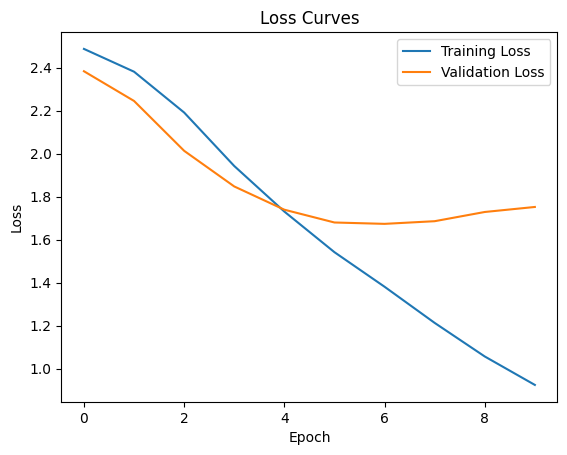

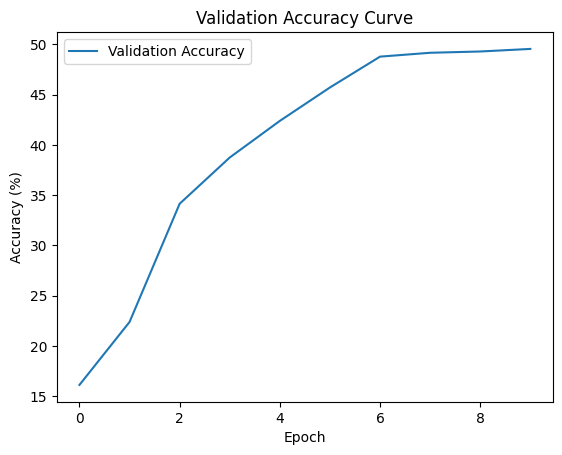

In [42]:
# Plot losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


In [43]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

def compute_metrics(y_true, y_pred, classes):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes, zero_division=1))

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def display_sample_predictions(model, test_loader, device, classes, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4 * num_samples))
    count = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for j in range(images.size(0)):
                if count >= num_samples:
                    break
                img = images[j].cpu().permute(1, 2, 0)
                img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
                img = img.clip(0, 1)
                axes[count, 0].imshow(img)
                axes[count, 0].set_title(f"True: {classes[labels[j]]}")
                axes[count, 0].axis('off')

                axes[count, 1].imshow(img)
                axes[count, 1].set_title(f"Pred: {classes[preds[j]]}")
                axes[count, 1].axis('off')

                count += 1
            if count >= num_samples:
                break
    plt.tight_layout()
    plt.show()


Accuracy: 0.6352
Precision: 0.6360
Recall: 0.6352
F1 Score: 0.6240

Classification Report:
                       precision    recall  f1-score   support

                Block       0.42      0.40      0.41        20
                Clear       0.68      0.63      0.65        51
   Cross Court Flight       0.33      0.08      0.13        12
                  Cut       0.35      0.38      0.36        21
      Defensive Clear       1.00      0.50      0.67         2
      Defensive Drive       1.00      0.78      0.88         9
            Drop Shot       0.59      0.79      0.67        42
            Flat Shot       0.75      0.35      0.48        17
                 Lift       0.50      0.62      0.55        34
           Long Serve       0.77      0.89      0.82        37
            Push Shot       0.29      0.25      0.27        20
Rear Court Flat Drive       1.00      0.67      0.80         3
            Rush Shot       1.00      1.00      1.00         5
      Short Flat Shot     

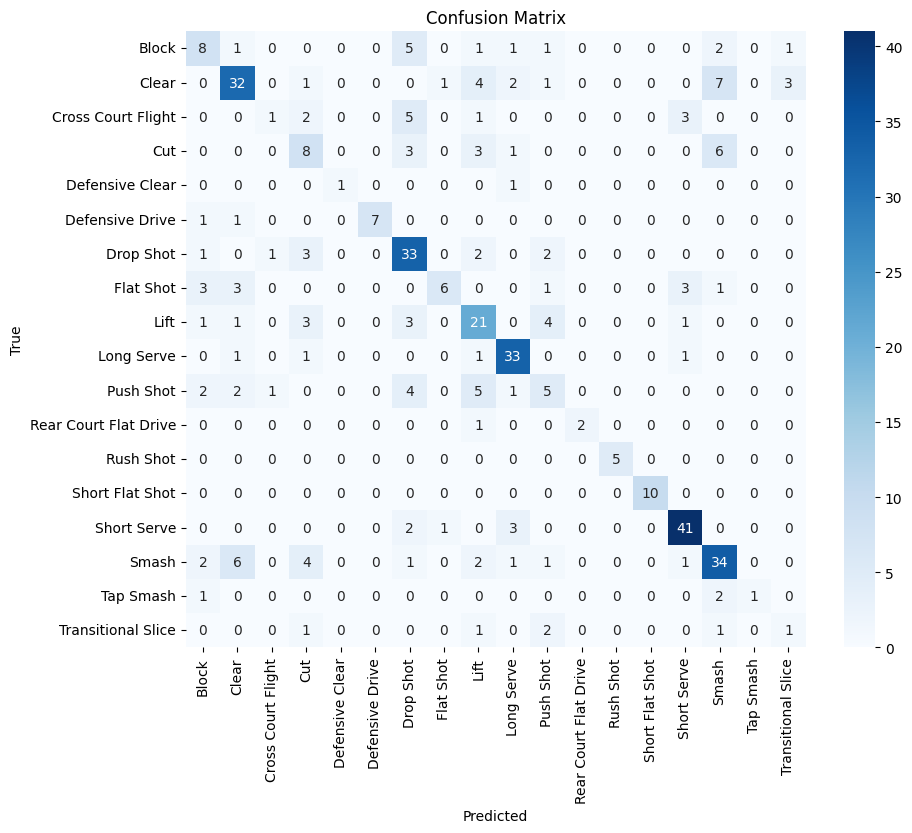

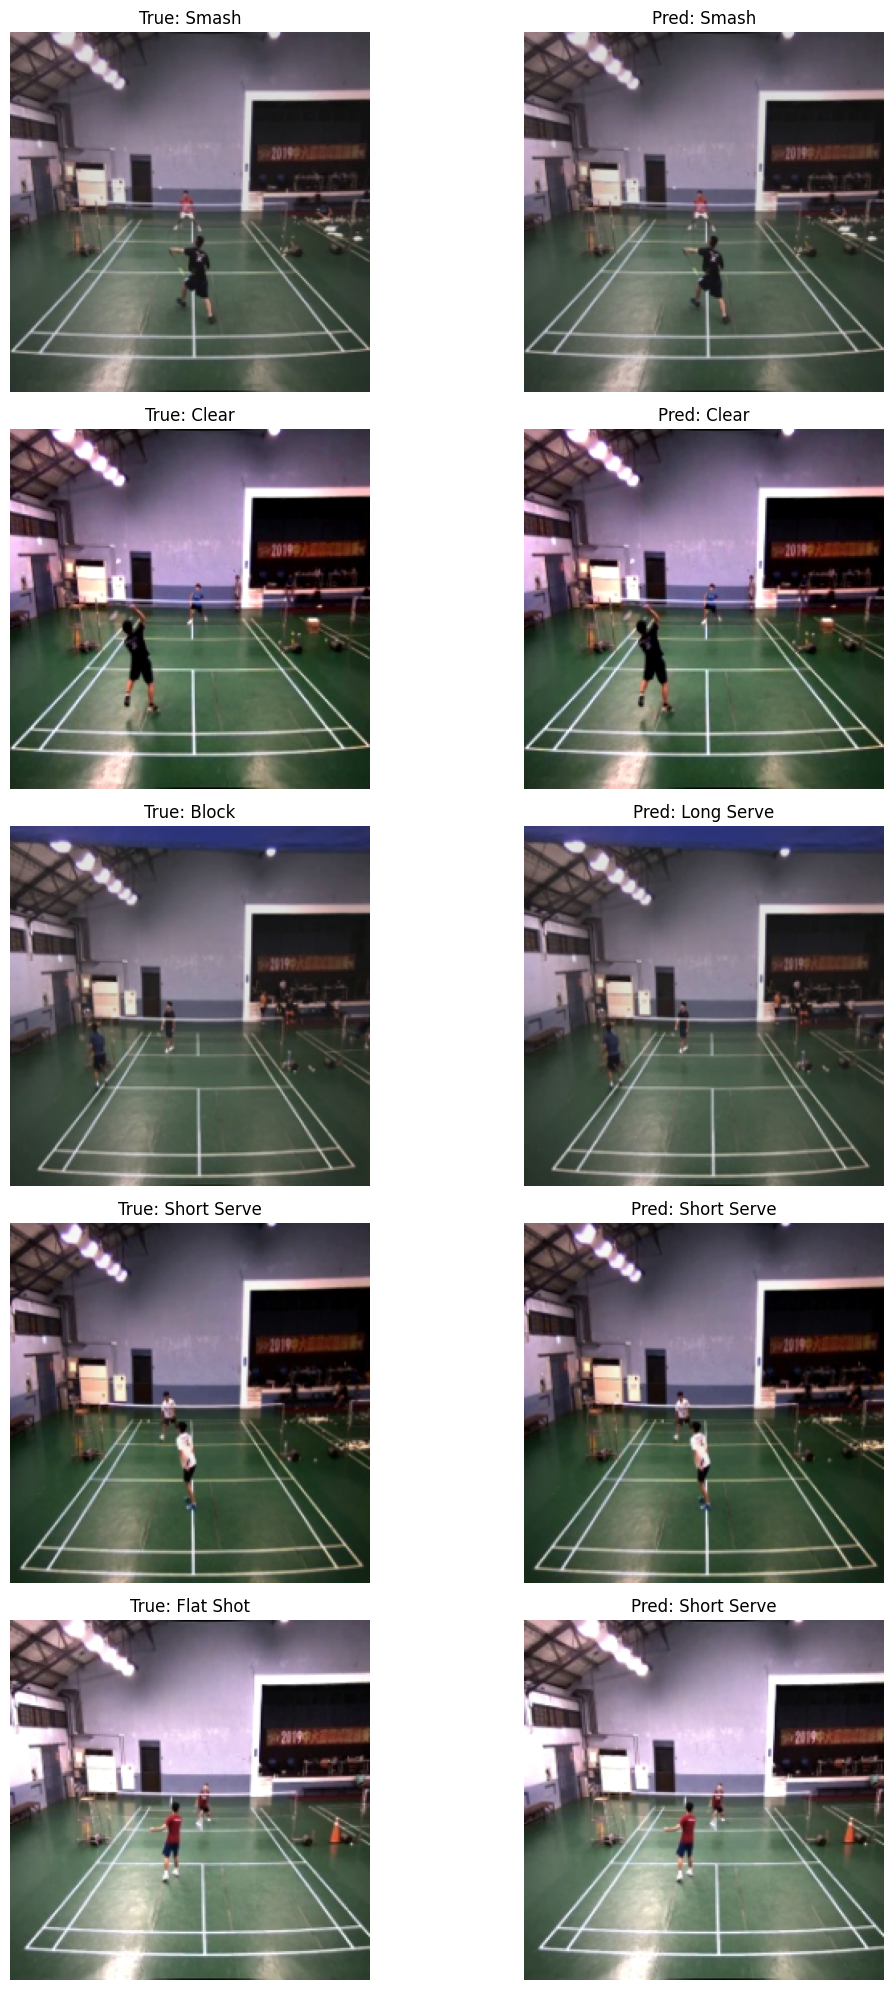

In [44]:
# Load best model before evaluation
checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

# Run evaluation
y_pred, y_true = evaluate_model(model, test_loader, device)
compute_metrics(y_true, y_pred, dataset.classes)
plot_confusion_matrix(y_true, y_pred, dataset.classes)
display_sample_predictions(model, test_loader, device, dataset.classes)


In [45]:
import torch
import torch.nn as nn

def evaluate_model(model, test_loader, device):
    model.eval()
    total_loss = 0.0
    num_samples = 0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * images.size(0)
            num_samples += images.size(0)

    average_loss = total_loss / num_samples
    return average_loss

In [46]:
test_error = evaluate_model(model, test_loader, device)

print(f"Test Error (Average Loss): {test_error:.4f}")

Test Error (Average Loss): 1.5166


ResNet

In [60]:
# === Modify your imports ===
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models import resnet50, ResNet50_Weights


Data Augmentation

In [62]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor()
])


In [63]:
# # === 1️⃣ Data Transforms for EfficientNet-B0 ===
# # You can still keep your ColorJitter if you like, but resize to 224×224
# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#     transforms.ToTensor(),
#     # use ImageNet normalization that EfficientNet expects
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std =[0.229, 0.224, 0.225]),
# ])

# Same as before, but it's worth explicitly stating for ResNet-50
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std =[0.229, 0.224, 0.225]),
])


In [64]:
# === 2️⃣ Load Dataset & DataLoaders (unchanged) ===
dataset = BadmintonDataset(
    csv_file='shot_labels.csv',
    img_dir='/content/output',
    transform=data_transforms
)

train_size = int(0.86 * len(dataset))
val_size   = int(0.09 * len(dataset))
test_size  = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size]
)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_ds,   batch_size=8,  shuffle=False)
test_loader  = torch.utils.data.DataLoader(test_ds,  batch_size=8,  shuffle=False)


Columns in the CSV file:
Index(['filename', 'Block', 'Clear', 'Cross Court Flight', 'Cut',
       'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift',
       'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot',
       'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash',
       'Transitional Slice'],
      dtype='object')

Identified shot type columns:
['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice']

Sample data (first 5 rows):
                                            filename  Block  Clear  \
0  2022-09-06_18-17-28_dataset_set1_154_013311_01...      1      0   
1  2022-09-06_18-09-11_dataset_set1_178_013389_01...      1      0   
2  2022-08-31_18-04-29_dataset_set1_124_010999_01...      1      0   
3  2022-09-06_17-42-57_dataset_set1_059_

In [65]:
# === 3️⃣ Instantiate ResNet-50 & replace its classifier ===
num_classes = len(dataset.classes)
weights     = ResNet50_Weights.DEFAULT
model       = resnet50(weights=weights)

# ResNet50 has a classifier like:
# model.fc = nn.Linear(in_features=2048, out_features=1000)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [66]:
# # === 4️⃣ Training setup (unchanged) ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# # Your train_model(...) from before will work as-is:
# train_model(model, train_loader, val_loader,
#             criterion, optimizer, num_epochs=10, device=device)

from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

train_model(model, train_loader, val_loader,
            criterion, optimizer, scheduler, num_epochs=10, device=device)

Epoch [1/10], Training Loss: 1.8993, Validation Loss: 1.5973, Validation Accuracy: 50.36%
Epoch [2/10], Training Loss: 1.4459, Validation Loss: 1.6878, Validation Accuracy: 47.08%
Epoch [3/10], Training Loss: 1.2938, Validation Loss: 1.4556, Validation Accuracy: 53.34%
Epoch [4/10], Training Loss: 1.1639, Validation Loss: 1.3896, Validation Accuracy: 58.75%
Epoch [5/10], Training Loss: 1.0453, Validation Loss: 1.4719, Validation Accuracy: 54.05%
Epoch [6/10], Training Loss: 0.9405, Validation Loss: 1.3535, Validation Accuracy: 60.31%
Epoch [7/10], Training Loss: 0.8358, Validation Loss: 1.4375, Validation Accuracy: 61.02%
Epoch [8/10], Training Loss: 0.7341, Validation Loss: 1.4280, Validation Accuracy: 56.19%
Epoch [9/10], Training Loss: 0.5983, Validation Loss: 1.6037, Validation Accuracy: 58.04%
Early stopping triggered.


([1.8993325962589926,
  1.4458677257608066,
  1.2938246860073752,
  1.163853711937499,
  1.0453428715962978,
  0.9405451598190072,
  0.8357994632171621,
  0.7341333565760112,
  0.5982569958881924],
 [1.59731828014959,
  1.6877777258103543,
  1.4555668715726247,
  1.389564302157272,
  1.4718984064053406,
  1.3534723620184443,
  1.4375282637774944,
  1.4279631791975012,
  1.603672200983221],
 [50.355618776671406,
  47.08392603129445,
  53.34281650071124,
  58.74822190611664,
  54.054054054054056,
  60.31294452347084,
  61.02418207681366,
  56.18776671408251,
  58.03698435277383])

In [67]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


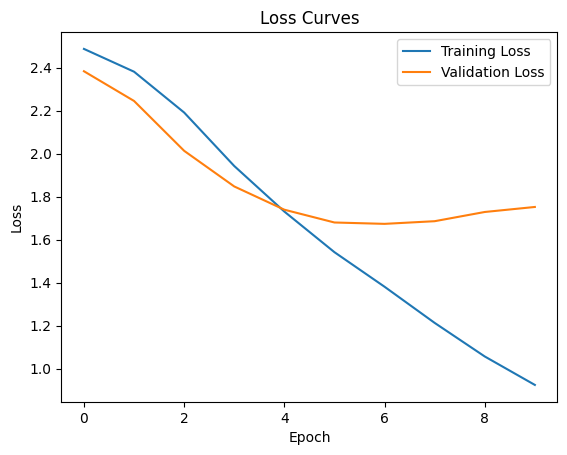

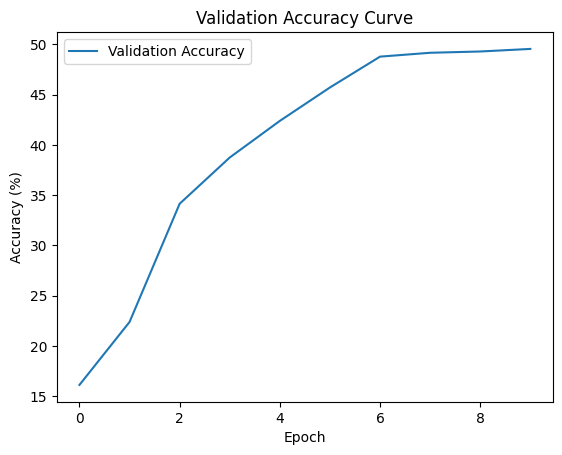

In [68]:
# Plot losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


In [69]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

def compute_metrics(y_true, y_pred, classes):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes, zero_division=1))

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def display_sample_predictions(model, test_loader, device, classes, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4 * num_samples))
    count = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for j in range(images.size(0)):
                if count >= num_samples:
                    break
                img = images[j].cpu().permute(1, 2, 0)
                img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
                img = img.clip(0, 1)
                axes[count, 0].imshow(img)
                axes[count, 0].set_title(f"True: {classes[labels[j]]}")
                axes[count, 0].axis('off')

                axes[count, 1].imshow(img)
                axes[count, 1].set_title(f"Pred: {classes[preds[j]]}")
                axes[count, 1].axis('off')

                count += 1
            if count >= num_samples:
                break
    plt.tight_layout()
    plt.show()


Accuracy: 0.6633
Precision: 0.6904
Recall: 0.6633
F1 Score: 0.6512

Classification Report:
                       precision    recall  f1-score   support

                Block       0.17      0.44      0.25         9
                Clear       0.67      0.61      0.64        51
   Cross Court Flight       1.00      0.07      0.12        15
                  Cut       0.53      0.50      0.51        36
      Defensive Clear       1.00      0.33      0.50         3
      Defensive Drive       1.00      1.00      1.00         7
            Drop Shot       0.72      0.90      0.80        40
            Flat Shot       0.70      0.54      0.61        13
                 Lift       0.63      0.56      0.59        39
           Long Serve       0.80      0.84      0.82        57
            Push Shot       0.24      0.33      0.28        12
Rear Court Flat Drive       1.00      0.38      0.55         8
            Rush Shot       1.00      0.89      0.94         9
      Short Flat Shot     

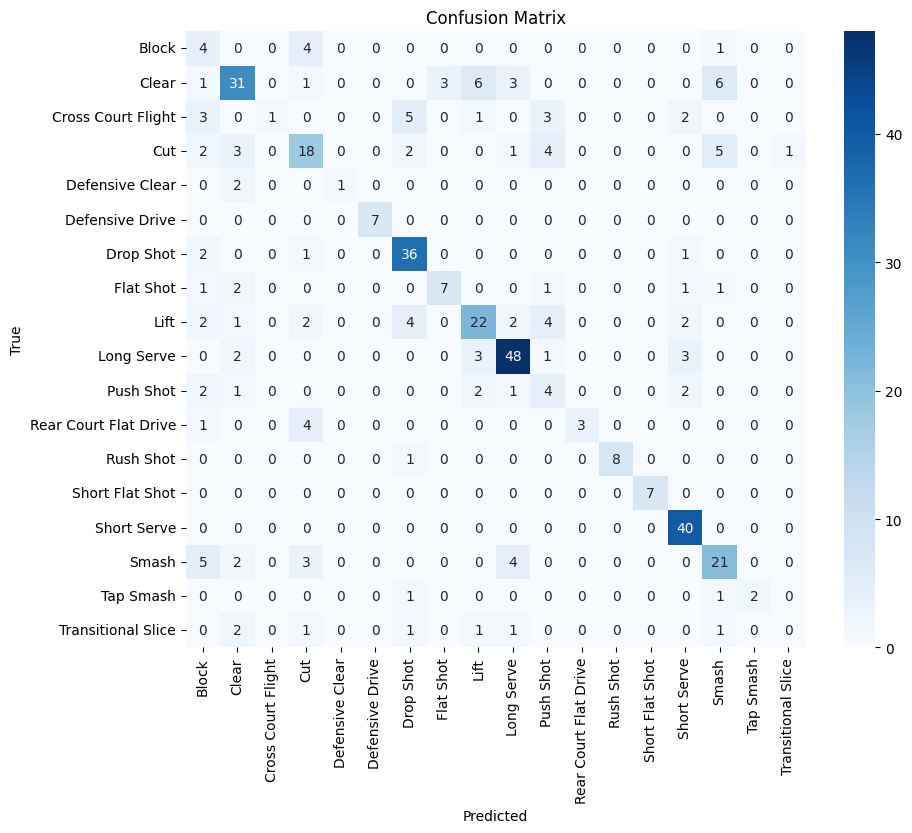

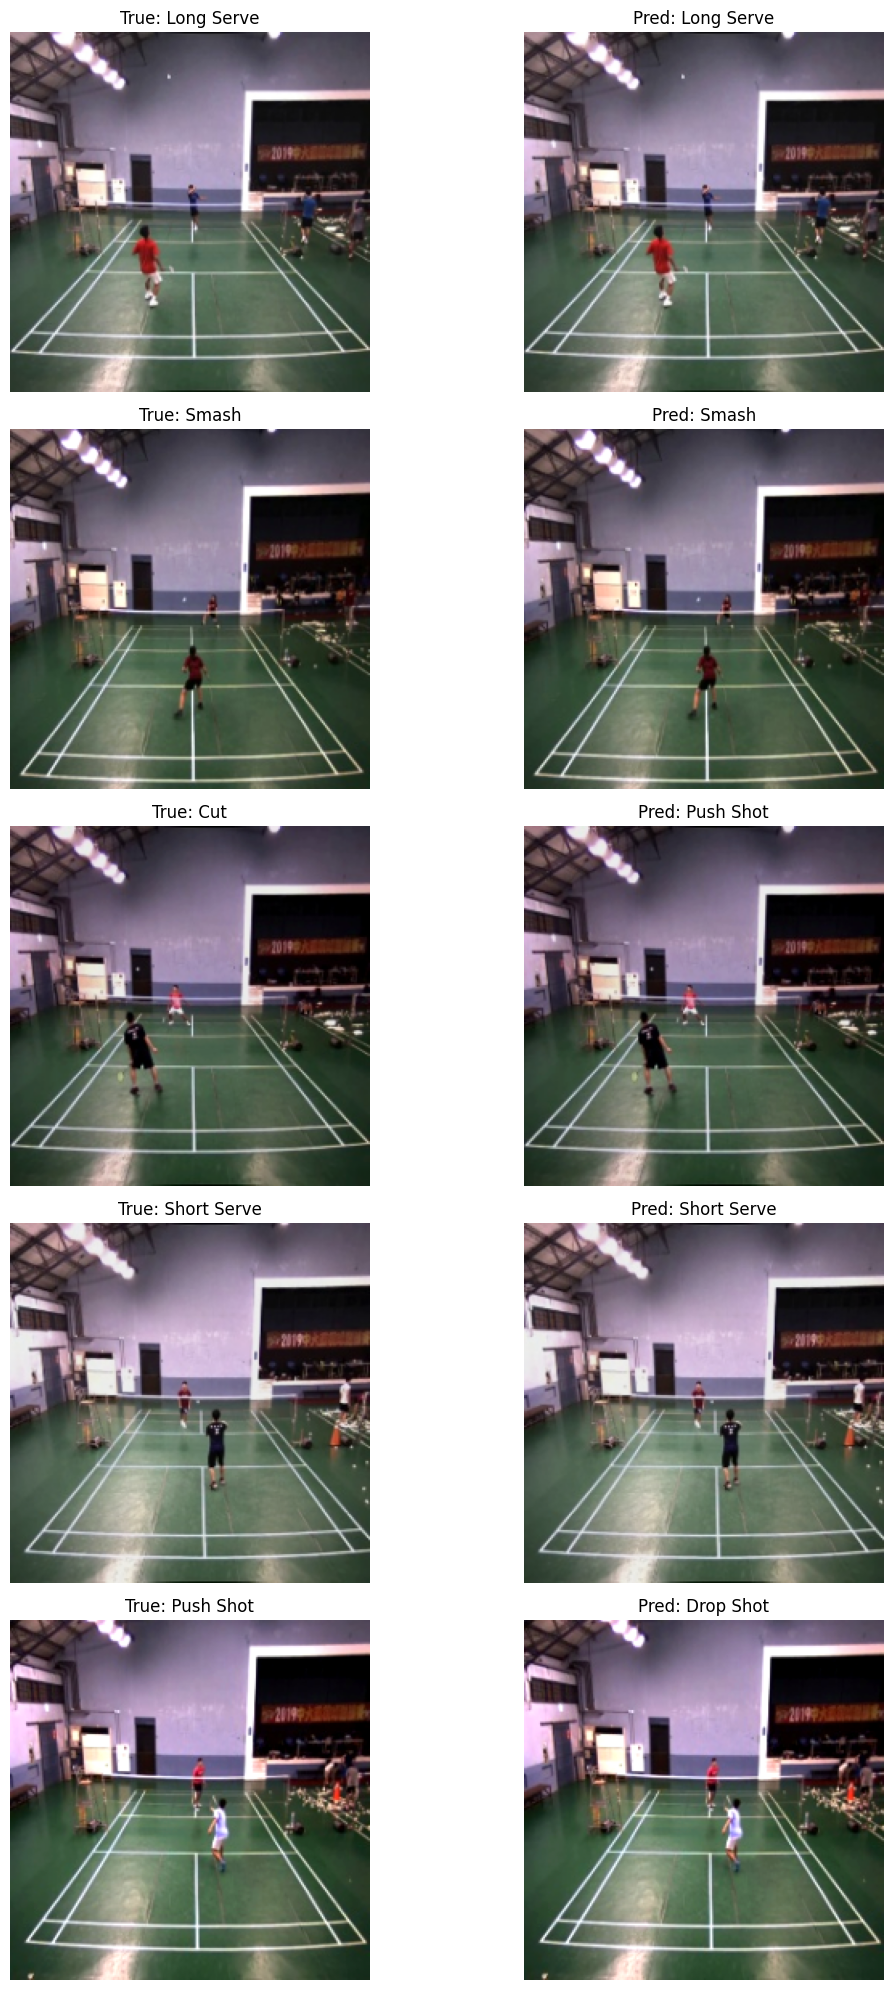

In [70]:
# Load best model before evaluation
checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

# Run evaluation
y_pred, y_true = evaluate_model(model, test_loader, device)
compute_metrics(y_true, y_pred, dataset.classes)
plot_confusion_matrix(y_true, y_pred, dataset.classes)
display_sample_predictions(model, test_loader, device, dataset.classes)


MobileNetV2

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights


In [72]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std =[0.229, 0.224, 0.225]),
])


In [73]:
dataset = BadmintonDataset(
    csv_file='shot_labels.csv',
    img_dir='/content/output',
    transform=data_transforms
)

train_size = int(0.86 * len(dataset))
val_size   = int(0.09 * len(dataset))
test_size  = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size]
)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_ds,   batch_size=8,  shuffle=False)
test_loader  = torch.utils.data.DataLoader(test_ds,  batch_size=8,  shuffle=False)


Columns in the CSV file:
Index(['filename', 'Block', 'Clear', 'Cross Court Flight', 'Cut',
       'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift',
       'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot',
       'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash',
       'Transitional Slice'],
      dtype='object')

Identified shot type columns:
['Block', 'Clear', 'Cross Court Flight', 'Cut', 'Defensive Clear', 'Defensive Drive', 'Drop Shot', 'Flat Shot', 'Lift', 'Long Serve', 'Push Shot', 'Rear Court Flat Drive', 'Rush Shot', 'Short Flat Shot', 'Short Serve', 'Smash', 'Tap Smash', 'Transitional Slice']

Sample data (first 5 rows):
                                            filename  Block  Clear  \
0  2022-09-06_18-17-28_dataset_set1_154_013311_01...      1      0   
1  2022-09-06_18-09-11_dataset_set1_178_013389_01...      1      0   
2  2022-08-31_18-04-29_dataset_set1_124_010999_01...      1      0   
3  2022-09-06_17-42-57_dataset_set1_059_

In [74]:
# === 3️⃣ Instantiate MobileNetV2 & replace its classifier ===
num_classes = len(dataset.classes)
weights     = MobileNet_V2_Weights.DEFAULT
model       = mobilenet_v2(weights=weights)

# MobileNetV2 has:
#   model.classifier = nn.Sequential(
#       nn.Dropout(0.2),
#       nn.Linear(1280, 1000),
#   )
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 107MB/s] 


In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

train_model(model, train_loader, val_loader,
            criterion, optimizer, scheduler, num_epochs=10, device=device)


Epoch [1/10], Training Loss: 1.8575, Validation Loss: 1.5298, Validation Accuracy: 52.20%
Epoch [2/10], Training Loss: 1.4037, Validation Loss: 1.3661, Validation Accuracy: 58.46%
Epoch [3/10], Training Loss: 1.2308, Validation Loss: 1.2974, Validation Accuracy: 59.17%
Epoch [4/10], Training Loss: 1.1009, Validation Loss: 1.2279, Validation Accuracy: 61.74%
Epoch [5/10], Training Loss: 1.0221, Validation Loss: 1.3475, Validation Accuracy: 57.75%
Epoch [6/10], Training Loss: 0.9376, Validation Loss: 1.1720, Validation Accuracy: 64.30%
Epoch [7/10], Training Loss: 0.8627, Validation Loss: 1.2174, Validation Accuracy: 63.30%
Epoch [8/10], Training Loss: 0.7769, Validation Loss: 1.2881, Validation Accuracy: 63.73%
Epoch [9/10], Training Loss: 0.7281, Validation Loss: 1.2881, Validation Accuracy: 64.30%
Early stopping triggered.


([1.8575176323394593,
  1.4037218609218642,
  1.23081304009057,
  1.1009114718776984,
  1.022078389155893,
  0.9376023627658354,
  0.8626546770546611,
  0.7769226209568014,
  0.7280914118765652],
 [1.5298444147814403,
  1.3661203360693022,
  1.2974422624842687,
  1.2278532064096495,
  1.3474615932526914,
  1.1719928265295245,
  1.2173694802278823,
  1.2881033967503093,
  1.288054997694086],
 [52.204836415362735,
  58.46372688477952,
  59.17496443812233,
  61.73541963015647,
  57.7524893314367,
  64.29587482219061,
  63.30014224751067,
  63.72688477951636,
  64.29587482219061])

In [76]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


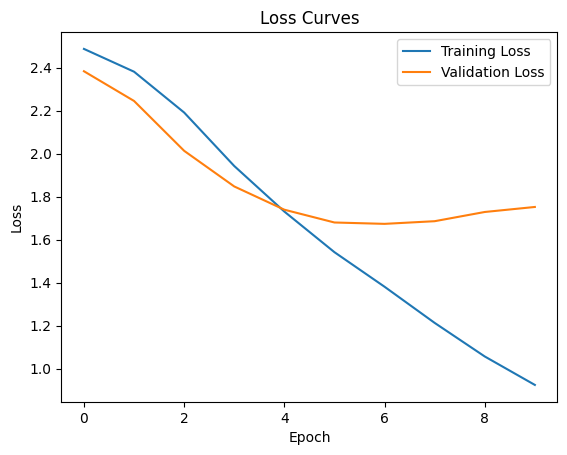

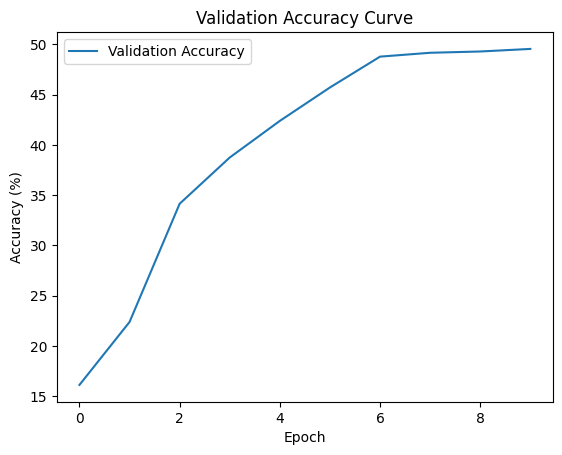

In [77]:
# Plot losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


In [78]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

def compute_metrics(y_true, y_pred, classes):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes, zero_division=1))

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def display_sample_predictions(model, test_loader, device, classes, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4 * num_samples))
    count = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for j in range(images.size(0)):
                if count >= num_samples:
                    break
                img = images[j].cpu().permute(1, 2, 0)
                img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
                img = img.clip(0, 1)
                axes[count, 0].imshow(img)
                axes[count, 0].set_title(f"True: {classes[labels[j]]}")
                axes[count, 0].axis('off')

                axes[count, 1].imshow(img)
                axes[count, 1].set_title(f"Pred: {classes[preds[j]]}")
                axes[count, 1].axis('off')

                count += 1
            if count >= num_samples:
                break
    plt.tight_layout()
    plt.show()


Accuracy: 0.6046
Precision: 0.6456
Recall: 0.6046
F1 Score: 0.5942

Classification Report:
                       precision    recall  f1-score   support

                Block       0.23      0.70      0.35        10
                Clear       0.70      0.73      0.72        60
   Cross Court Flight       1.00      0.00      0.00         9
                  Cut       0.34      0.45      0.39        22
      Defensive Clear       0.33      0.25      0.29         4
      Defensive Drive       1.00      0.86      0.92         7
            Drop Shot       0.46      0.81      0.59        31
            Flat Shot       0.82      0.64      0.72        22
                 Lift       0.59      0.41      0.49        46
           Long Serve       0.83      0.88      0.85        43
            Push Shot       0.36      0.15      0.21        33
Rear Court Flat Drive       0.75      0.75      0.75         4
            Rush Shot       1.00      0.62      0.77         8
      Short Flat Shot     

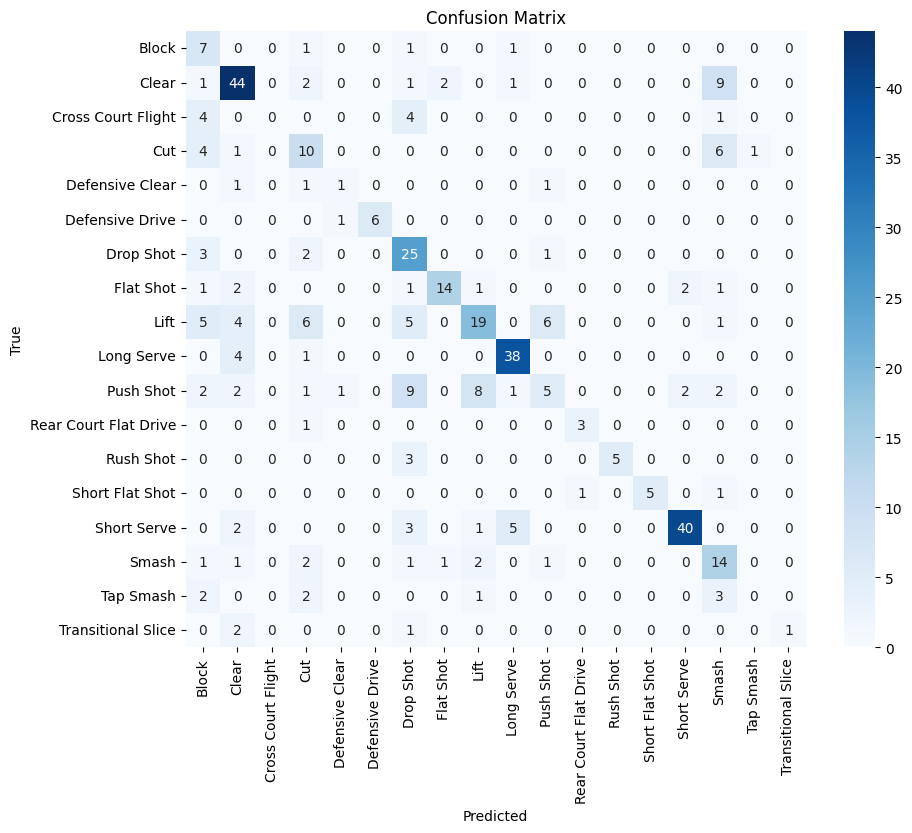

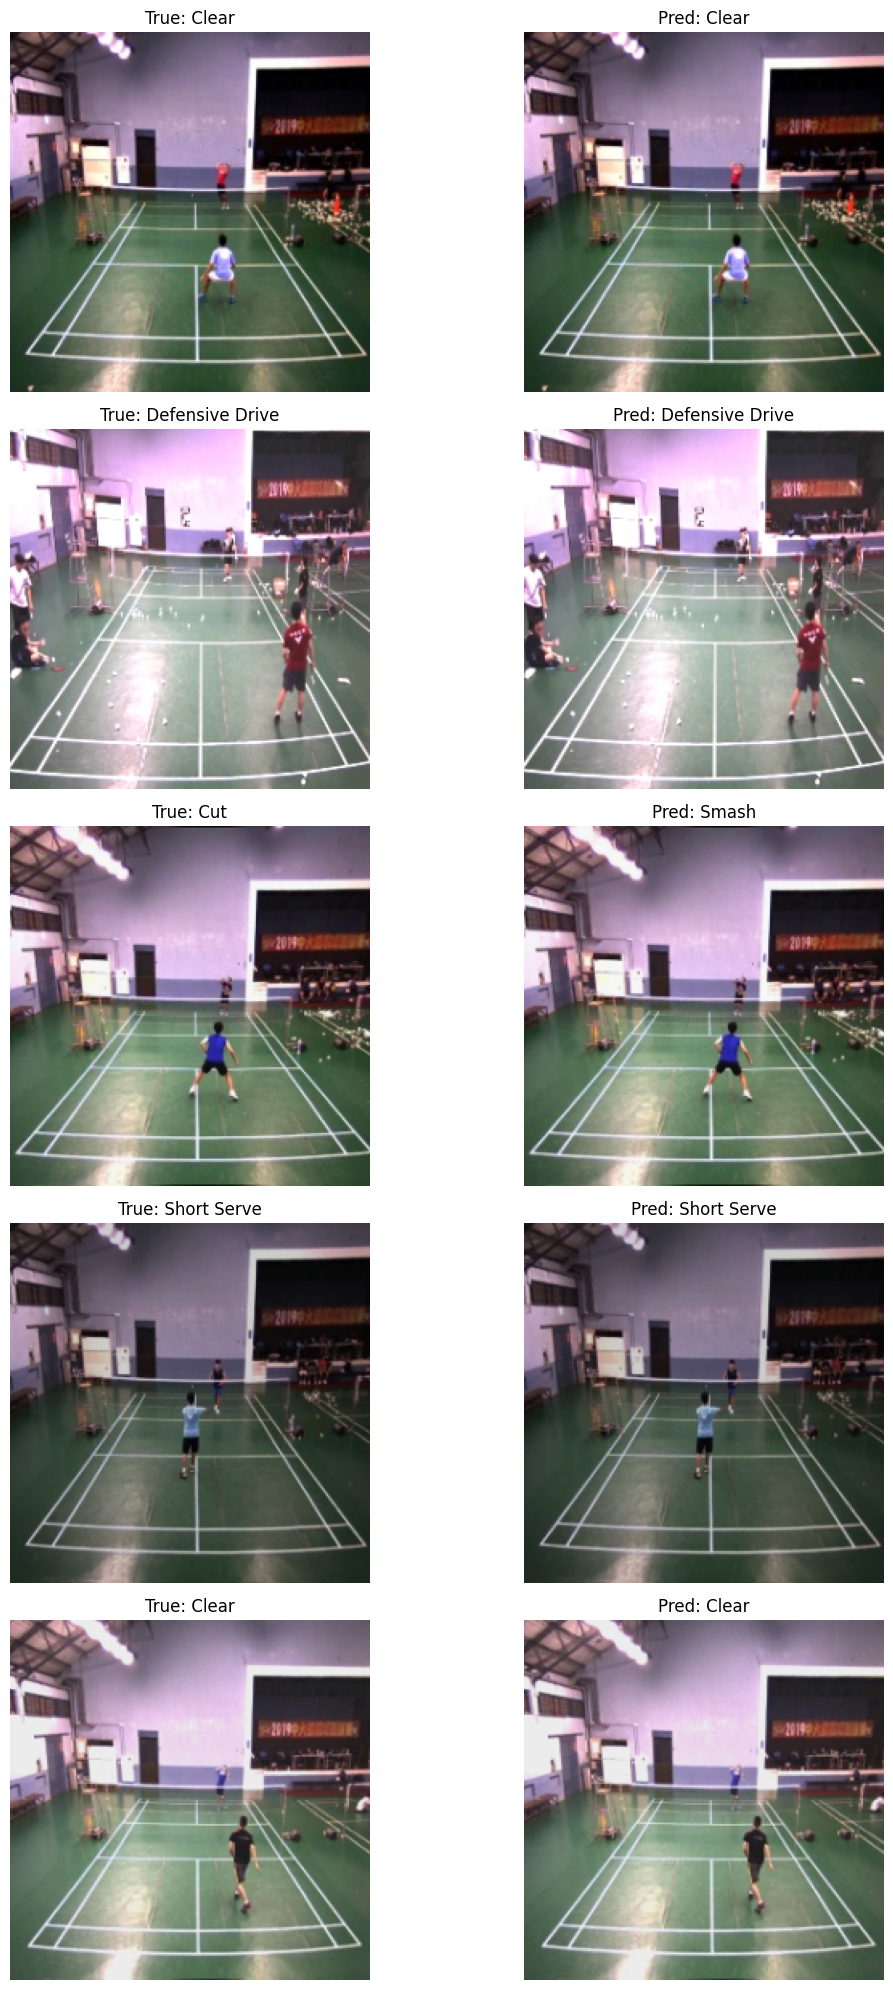

In [79]:
# Load best model before evaluation
checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

# Run evaluation
y_pred, y_true = evaluate_model(model, test_loader, device)
compute_metrics(y_true, y_pred, dataset.classes)
plot_confusion_matrix(y_true, y_pred, dataset.classes)
display_sample_predictions(model, test_loader, device, dataset.classes)
